<a href="https://colab.research.google.com/github/iman-ezatfar/Heart_Disease_uci_Classification/blob/main/Heart_disease_uci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import pandas as pd

df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 1-Dealing With Missing Values

In [283]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- First find all values
- Next, change 0 values to NA
- Finally, filling NA with median

In [284]:
print(df['trestbps'].isna().sum())
print(df['trestbps'].describe())

59
count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


In [285]:
df['trestbps'] = df['trestbps'].replace(0, pd.NA)

In [286]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
df['trestbps'].describe()

,trestbps
count,920.000000
mean,132.136957
std,17.929761
min,80.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


chol (serum cholesterol in mg/dl)

In [287]:
df['chol'].describe()

,chol
count,890.000000
mean,199.130337
std,110.780810
min,0.000000
25%,175.000000
50%,223.000000
75%,268.000000
max,603.000000


In [288]:
df['chol'] = df['chol'].replace(0, pd.NA)
df['chol'] = df['chol'].fillna(df['chol'].median())
df['chol'].describe()

,chol
count,920.000000
mean,245.222826
std,51.785328
min,85.000000
25%,217.750000
50%,239.500000
75%,267.000000
max,603.000000


In [289]:
df['fbs'].describe()

,fbs
count,830
unique,2
top,False
freq,692


In [290]:
df['fbs'] = df['fbs'].astype(str).str.strip().str.lower()
df['fbs'] = df['fbs'].map({'true': 1, 'false': 0})
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0]).astype(int)
df['fbs'].describe()

,fbs
count,920.000000
mean,0.150000
std,0.357266
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


restecg (resting electrocardiographic results)
- Values: [normal, stt abnormality, lv hypertrophy]

In [291]:
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])

thalch: maximum heart rate achieved

In [292]:
df['thalch'].describe()

,thalch
count,865.000000
mean,137.545665
std,25.926276
min,60.000000
25%,120.000000
50%,140.000000
75%,157.000000
max,202.000000


In [293]:
df['thalch'] = df['thalch'].fillna(df['thalch'].median())
df['thalch'].describe()

,thalch
count,920.000000
mean,137.692391
std,25.145235
min,60.000000
25%,120.000000
50%,140.000000
75%,156.000000
max,202.000000


exang: exercise-induced angina (True/ False)

In [294]:
df['exang'].describe()

,exang
count,865
unique,2
top,False
freq,528


In [295]:
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['exang'].describe()

,exang
count,920
unique,2
top,False
freq,583


oldpeak: ST depression induced by exercise relative to rest

In [296]:
df['oldpeak'].describe()

,oldpeak
count,858.000000
mean,0.878788
std,1.091226
min,-2.600000
25%,0.000000
50%,0.500000
75%,1.500000
max,6.200000


In [297]:
df.loc[df['oldpeak']<0, 'oldpeak'] = pd.NA
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())
df['oldpeak'].describe()

,oldpeak
count,920.000000
mean,0.873587
std,1.033091
min,0.000000
25%,0.000000
50%,0.500000
75%,1.500000
max,6.200000


slope: the slope of the peak exercise ST segment

In [298]:
df['slope'].describe()

,slope
count,611
unique,3
top,flat
freq,345


In [299]:
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['slope'].describe()

,slope
count,920
unique,3
top,flat
freq,654


ca: number of major vessels (0-3) colored by fluoroscopy

In [300]:
df['ca'].describe()

,ca
count,309.000000
mean,0.676375
std,0.935653
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [301]:
df['ca'] = df['ca'].fillna(df['ca'].median())
df['ca'].describe()

,ca
count,920.000000
mean,0.227174
std,0.628936
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


thal: [normal; fixed defect; reversible defect]

In [302]:
df['thal'].describe()

,thal
count,434
unique,3
top,normal
freq,196


In [303]:
df['thal'] = df['thal'].replace(['nan', '<na>', 'none', 'n/a', 'na'], pd.NA)
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
df['thal'].describe()

,thal
count,920
unique,3
top,normal
freq,682


In [304]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


# 2-Conversions

In [305]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Convert num to binary classification:

0 → No disease

1–4 → Disease present

In [306]:
df['num'] = df['num'].replace([1,2,3,4], 1)
df['num'].value_counts()

,count
num,
1,509
0,411


# 3-Feature Engineering

In [307]:
df.dtypes

,0
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,int64
restecg,object
thalch,float64


In [308]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)
df.head()

,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,1,150.0,False,2.3,0.0,0,...,False,False,False,True,False,False,False,False,False,False
1,2,67,160.0,286.0,0,108.0,True,1.5,3.0,1,...,False,False,False,False,False,False,True,False,True,False
2,3,67,120.0,229.0,0,129.0,True,2.6,2.0,1,...,False,False,False,False,False,False,True,False,False,True
3,4,37,130.0,250.0,0,187.0,False,3.5,0.0,0,...,False,False,True,False,True,False,False,False,True,False
4,5,41,130.0,204.0,0,172.0,False,1.4,0.0,0,...,False,True,False,False,False,False,False,True,True,False


In [309]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,1,150.0,0,2.3,0.0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,67,160.0,286.0,0,108.0,1,1.5,3.0,1,...,0,0,0,0,0,0,1,0,1,0
2,3,67,120.0,229.0,0,129.0,1,2.6,2.0,1,...,0,0,0,0,0,0,1,0,0,1
3,4,37,130.0,250.0,0,187.0,0,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,5,41,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,1,0,0,0,0,0,1,1,0


# 4-Preparing Feature Matrix, Target Vector, & Train-Test-Split

In [310]:
X = df.drop(columns = ['id', 'num'])
y = df['num']

In [311]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

## 4.1-Train Classifiers

In [312]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [313]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        82
           1       0.84      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Accuracy RF: 0.7989130434782609


In [314]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [315]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        82
           1       0.84      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [316]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [317]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        82
           1       0.85      0.86      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [318]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=21, batch_size=16, verbose=1)


Epoch 1/21
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5759 - loss: 0.6753 - val_accuracy: 0.8207 - val_loss: 0.5222
Epoch 2/21
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7346 - loss: 0.5423 - val_accuracy: 0.8424 - val_loss: 0.4373
Epoch 3/21
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8070 - loss: 0.4589 - val_accuracy: 0.8424 - val_loss: 0.3870
Epoch 4/21
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8153 - loss: 0.4280 - val_accuracy: 0.8533 - val_loss: 0.3679
Epoch 5/21
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8405 - loss: 0.3823 - val_accuracy: 0.8533 - val_loss: 0.3583
Epoch 6/21
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8458 - loss: 0.3914 - val_accuracy: 0.8533 - val_loss: 0.3531
Epoch 7/21
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8406 - loss: 0.4056 - val_accuracy: 0.8533 - val_loss: 0.3564
Epoch 8/21
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8247 - loss: 0.4047 - val_accuracy: 0.8533 - val_los

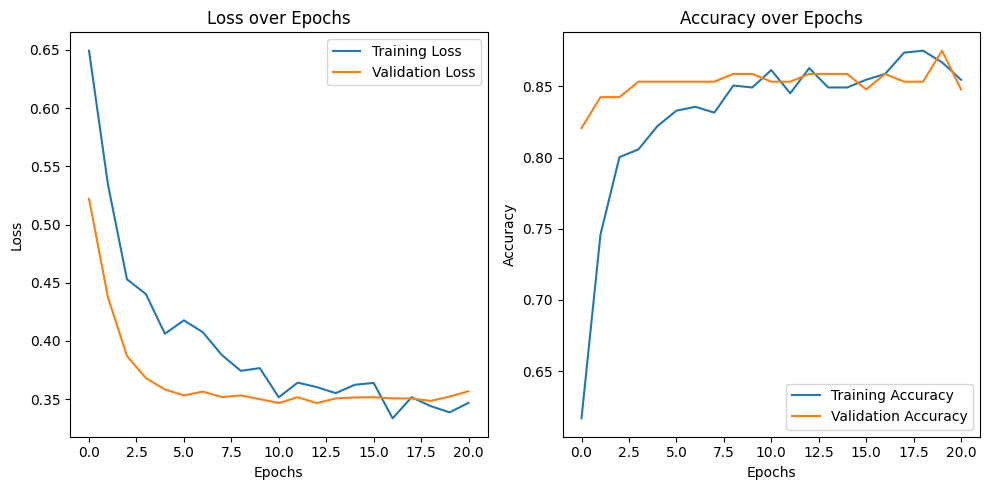

In [319]:
import matplotlib.pyplot as plt

history_dict = history.history

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [320]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {acc:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8419 - loss: 0.4080 
Test accuracy: 0.8478


In [321]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                    solver='adam', max_iter=500, random_state=42)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [322]:
y_pred_mlp = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

[[64 18]
 [12 90]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        82
           1       0.83      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

